<a href="https://colab.research.google.com/github/nico-gith/kuzushizi/blob/main/kmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#深層学習によるくずし字画像の分類

くずし字(日本古典のひらがな)10種類について70000枚の画像データを用いて深層学習による分類を行い、

正解率が最大となるようなモデルを構築した。

<方法>

1.TensorFlowにあるkmnistの画像データ70000枚を使用し、10000枚をテスト用、60000枚を訓練用とする。

2.比較としてロジステティック回帰、FNN、CNNの3つのモデルを使用し性能の改善を検討する。

<結果>　　

正解率は以下の通り。　ロジスティック回帰：0.67、 FNN：0.87、 CNN:0.98

性能を改善出来、CNNについては種々のパターンで試行した結果、最も性能の良いモデルは

下段「6.モデル性能の改善」の「#モデルの構造を表示」の記載モデルとなった。

#0.ドライブのマウント

In [ ]:
#ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.必要ライブラリのインポート

In [ ]:
#必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2.**データの準備**

#2.データの準備

2.1　データの確認

In [ ]:
#npz(numpyバイナリ)ファイルの読み込み(特徴量のテストデータ)
x_testf = np.load('/content/drive/MyDrive/mnist/kmnist-test-imgs.npz')

In [ ]:
#x_testのデータ型を確認
type(x_testf)

#npz型となっている

numpy.lib.npyio.NpzFile

In [ ]:
#npz型のオブジェクトなのでそれに格納されているndarrayのファイル名をfilesで取得
print(x_testf.files)

['arr_0']


In [ ]:
#x_testf['arr_0']のデータ型を確認
x_test = x_testf['arr_0']

type(x_test)

numpy.ndarray

In [ ]:
#arr_0(ndarrayデータ)の中身を確認
x_test

array([[[  0,  97,  35, ...,   0,   0,   0],
        [  0,  34, 143, ...,   0,   0,   0],
        [  0,   0,  49, ...,   0,   0,   0],
        ...,
        [  0, 126, 254, ...,   0,   0,   0],
        [  0,  15, 224, ...,   0,   0,   0],
        [  0,   0,  68, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [ ]:
#arr_0の0番目のデータを確認
x_test[0]

array([[  0,  97,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,  34, 143,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  25,  20,   0,   0,   0,  30, 127, 117,  34,   0,   0,
          0,   0],
       [  0,   0,  49,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  77, 238, 235,  39,  20, 133, 181, 165, 210, 243,  82,   0,
          0,   0],
       [  0,   0,   0, 134,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        126, 145, 227, 255, 235, 238, 138,   8,   0,  16, 236, 173,   0,
          0,   0],
       [  0,   0,   0, 173,   5,   0,   0,   0,   0,   0,   0,   0, 133,
         94,   2, 207, 255, 255, 172,   0,   2,   8,   0, 172, 180,   0,
          0,   0],
       [  0,   0,   0, 164,   8,   0,   0,   0,   0,   0,   0,  90,  71,
          0,  11, 236, 251, 223,  43,   6, 167, 182,  41, 233, 133,   0,
          0,   0],
       [  

In [ ]:
#arr_0とarr_0の0番目のデータの形状を確認
print(x_test.shape)
print(x_test[0].shape)

(10000, 28, 28)
(28, 28)


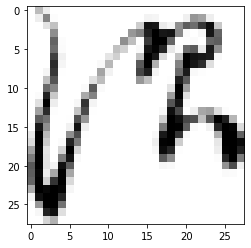

In [ ]:
#画像で表示(matplotlibのimshow関数を使用する)
#第一引数:配列オブジェクト,第二引数:アスペクト(縦横)比、色彩(RGBA次元を持たない場合)
plt.imshow(x_test[0], cmap='Greys')

In [ ]:
#ラベルのテストデータの読み込み
y_testf = np.load('/content/drive/MyDrive/mnist/kmnist-test-labels.npz')

In [ ]:
#y_testのデータ型を確認
type(y_testf)

#npz型となっている

numpy.lib.npyio.NpzFile

In [ ]:
##npz型のオブジェクトなのでそれに格納されているndarrayのファイル名をfilesで取得
y_testf.files

['arr_0']

In [ ]:
#y_testのデータ型はndarrayなのでshapeを使用して形状を確認する
y_test = y_testf['arr_0']

y_test.shape

(10000,)

In [ ]:
#y_test['arr_0']の中身
y_test

array([2, 9, 3, ..., 9, 4, 2], dtype=uint8)

In [ ]:
#ラベルとひらがなの対応表
corr_table = pd.read_csv('/content/drive/MyDrive/mnist/kmnist_classmap (1).csv')

corr_table

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


2.2　訓練データの読み込み

In [ ]:
#他のデータも読み込み(訓練用データ)
x_trainf = np.load('/content/drive/MyDrive/mnist/kmnist-train-imgs.npz')
y_trainf = np.load('/content/drive/MyDrive/mnist/kmnist-train-labels.npz')

In [ ]:
#訓練用データnpz型のファイル名を確認
print(x_trainf.files)
print(y_trainf.files)

['arr_0']
['arr_0']


In [ ]:
#訓練用データファイルの形状を確認
x_train_ = x_trainf['arr_0']
y_train_ = y_trainf['arr_0']

print('x_train_:', x_train_.shape)
print('y_train_:', y_train_.shape)

x_train_: (60000, 28, 28)
y_train_: (60000,)


  2.3　データセットの分割

In [ ]:
#データセットの分割(ホールドアウト法)

#データセットを分割する関数の読み込み
from sklearn.model_selection import train_test_split

#訓練用データを学習用と検証用に分ける
x_train, x_valid, y_train, y_valid = train_test_split(x_train_, y_train_, test_size=0.3, random_state=0)

#3.ロジスティック回帰による学習と評価

In [ ]:
#ロジスティック回帰:分類モデル(目的変数の値となる発生確率を出力する)

#ロジスティック回帰モデルに必要なライブラリのインポート
from sklearn.linear_model import LogisticRegression

In [ ]:
#データ加工
#3次元配列から2次元配列へ形状変更(LogisticRegressionモデルの引数は2次元配列想定の為)
#また、要素を変更した際に、元の配列に影響させない為、キャスト変換を行なっている
x_train_r = x_train.reshape(len(x_train), -1).astype(np.float64)

print('x_train_r:', x_train_r.shape)

x_valid_r = x_valid.reshape(len(x_valid), -1).astype(np.float64)

print('x_valid_r:', x_valid_r.shape)

x_test_r = x_test.reshape(len(x_test), -1).astype(np.float64)

print('x_test_r:', x_test_r.shape)

x_train_r: (42000, 784)
x_valid_r: (18000, 784)
x_test_r: (10000, 784)


In [ ]:
# ロジスティック回帰（多クラス分類）モデル学習
normal_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=3000)
normal_model.fit(x_train_r, y_train)
y_pred = normal_model.predict(x_valid_r)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#モデル評価

#モデル評価に必要なライブラリのインポート
from sklearn.metrics import classification_report

#モデル評価
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1777
           1       0.79      0.78      0.79      1865
           2       0.69      0.67      0.68      1816
           3       0.82      0.84      0.83      1772
           4       0.76      0.77      0.77      1755
           5       0.83      0.80      0.81      1775
           6       0.76      0.80      0.78      1838
           7       0.85      0.83      0.84      1814
           8       0.78      0.80      0.79      1787
           9       0.81      0.81      0.81      1801

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000



In [ ]:
#モデル評価(テストデータ)

#テストデータの予測
y_pred_test = normal_model.predict(x_test_r)

#テストデータの評価
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       934
           1       0.66      0.64      0.65      1028
           2       0.62      0.54      0.58      1161
           3       0.74      0.78      0.76       954
           4       0.66      0.63      0.64      1038
           5       0.69      0.75      0.72       917
           6       0.73      0.66      0.69      1103
           7       0.54      0.69      0.61       783
           8       0.70      0.59      0.64      1182
           9       0.64      0.71      0.67       900

    accuracy                           0.67     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
print('テストデータ予測値:', y_pred_test[6])
print('テストデータ正解値', y_test[6])

テストデータ予測値: 8
テストデータ正解値 8


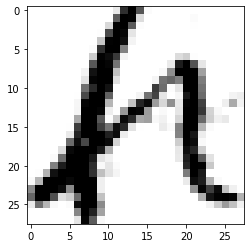

In [ ]:
plt.imshow(x_test[6], cmap='Greys')

In [ ]:
#モデルの考察

#重みベクトルの取得
coefs = normal_model.coef_

coefs.shape

(10, 784)

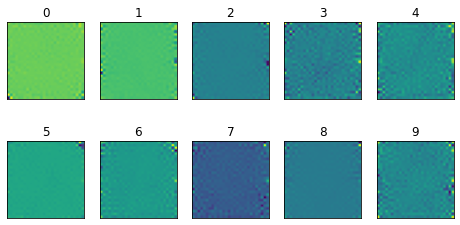

In [ ]:
#重みベクトルの画像出力

#2行5列にグラフを分割
fig, ax = plt.subplots(2, 5, figsize=(8, 4))

for i in range(2):
  for j in range(5):
    z = i * 5 + j

    ax[i, j].imshow(coefs[z].reshape(28, 28), cmap='viridis')

    ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

    ax[i, j].set_title(z)

plt.show()

#4.ディープラーニング(FNN)による学習と評価

In [ ]:
#全結合層ニューラルネットワーク

#Keras(pythonで書かれたニューラルネットワークライブラリ)のインポート
#(独立版kerasの際はimport kerasであったがtensorflow組込み版kerasは以下のように記載する)
from tensorflow import keras

#全結合層モジュール、活性化関数モジュール、ドロップアウトモジュールをインポート
from tensorflow.keras.layers import Dense, Activation, Dropout

#正則化モジュールをインポート
from tensorflow.keras import regularizers

In [ ]:
#カテゴリー変数への展開(線形回帰やニューラルネットではone-hot表現の方が適切)

#to_categorical関数のインポート
from tensorflow.keras.utils import to_categorical

#目的変数の各種データのカテゴリー変数への展開
y_train_c = to_categorical(y_train)
y_valid_c = to_categorical(y_valid)
y_test_c = to_categorical(y_test)

In [ ]:
#ニューラルネットワークのモデル構築

#モデルの初期化
model = keras.Sequential()

#入力層(出力形状数は入力側１ユニットから出ているエッジの数に等しい為、入力層のパラメータ数は784*出力形状数+出力形状数)
model.add(Dense(256, activation='relu', input_shape=(784,)))

#隠れ層
model.add(Dense(32, activation='relu'))

#出力層(10個に分類するので出力形状は10)
model.add(Dense(10, activation='softmax'))

#モデルの構築
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#モデルの構造を表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#ニューラルネットワークの学習

%%time

log = model.fit(x_train_r, y_train_c, epochs=3000, batch_size=2000, verbose=True,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(x_valid_r, y_valid_c))

Epoch 1/3000
21/21 [==============================] - 4s 41ms/step - loss: 79.4952 - accuracy: 0.1500 - val_loss: 2.4318 - val_accuracy: 0.1812
Epoch 2/3000
21/21 [==============================] - 0s 13ms/step - loss: 2.3229 - accuracy: 0.1918 - val_loss: 2.1778 - val_accuracy: 0.2093
Epoch 3/3000
21/21 [==============================] - 0s 14ms/step - loss: 2.1142 - accuracy: 0.2270 - val_loss: 2.0400 - val_accuracy: 0.2508
Epoch 4/3000
21/21 [==============================] - 0s 14ms/step - loss: 1.9572 - accuracy: 0.2797 - val_loss: 1.9722 - val_accuracy: 0.2748
Epoch 5/3000
21/21 [==============================] - 0s 13ms/step - loss: 1.9924 - accuracy: 0.2653 - val_loss: 2.0885 - val_accuracy: 0.2120
Epoch 6/3000
21/21 [==============================] - 0s 14ms/step - loss: 1.9456 - accuracy: 0.2974 - val_loss: 1.8168 - val_accuracy: 0.3989
Epoch 7/3000
21/21 [==============================] - 0s 14ms/step - loss: 1.7358 - accuracy: 0.4003 - val_loss: 1.8950 - val_accuracy: 0.421

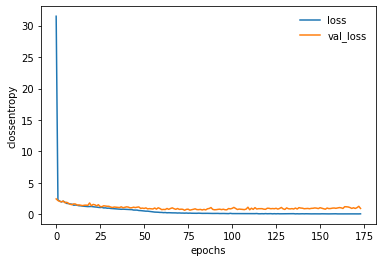

In [ ]:
#グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) #凡例フレームを表示しない
plt.xlabel('epochs')
plt.ylabel('clossentropy')
plt.show()

In [ ]:
#モデルの評価(テストデータによる評価)
y_pred = model.predict_classes(x_test_r)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1000
           1       0.89      0.84      0.86      1000
           2       0.83      0.82      0.82      1000
           3       0.89      0.93      0.91      1000
           4       0.66      0.90      0.76      1000
           5       0.91      0.85      0.88      1000
           6       0.88      0.91      0.90      1000
           7       0.92      0.83      0.87      1000
           8       0.90      0.83      0.86      1000
           9       0.93      0.86      0.89      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.87     10000
weighted avg       0.87      0.86      0.87     10000



#5.ディープラーニング(CNN)による学習と評価

In [ ]:
#CNNに必要なライブラリのインポート
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

In [ ]:
#入力データをグレースケールを含んだ形状にreshape(色指定が無いとCNNの際にエラーとなる)
x_train_g = x_train.reshape(len(x_train), 28, 28, 1)
x_valid_g = x_valid.reshape(len(x_valid), 28, 28, 1)
x_test_g = x_test.reshape(len(x_test), 28, 28, 1)

print('x_train_g:', x_train_g.shape)
print('x_valid_g:', x_valid_g.shape)
print('x_test_g:', x_test_g.shape)

x_train_g: (42000, 28, 28, 1)
x_valid_g: (18000, 28, 28, 1)
x_test_g: (10000, 28, 28, 1)


In [ ]:
#ニューラルネットワークモデルの構築(Conv2Dを入力層に使用)

#モデルの初期化
model = keras.Sequential()

#入力層(パラメータ数はフィルター縦×横×入力チャネル数×出力チャネル数＋出力チャネル数)
model.add(Conv2D(392, kernel_size=3, padding='same', strides=1,
                 input_shape=(28, 28, 1), activation='relu'))

model.add(Flatten())#最終的な出力層の形状と同じ1次元に変換

#隠れ層
model.add(Dense(32, activation='relu'))

#出力層
model.add(Dense(10, activation='softmax'))

#モデルの構築
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#モデルの構造を表示
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 392)       3920      
_________________________________________________________________
flatten_2 (Flatten)          (None, 307328)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                9834528   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 9,838,778
Trainable params: 9,838,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#ニューラルネットワークの学習

%%time

log = model.fit(x_train_g, y_train_c, epochs=3000, batch_size=1000, verbose=True,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(x_valid_g, y_valid_c))

Epoch 1/3000
42/42 [==============================] - 17s 402ms/step - loss: 121.0213 - accuracy: 0.2990 - val_loss: 1.6384 - val_accuracy: 0.4368
Epoch 2/3000
42/42 [==============================] - 17s 400ms/step - loss: 1.6379 - accuracy: 0.4524 - val_loss: 1.7288 - val_accuracy: 0.3918
Epoch 3/3000
42/42 [==============================] - 17s 403ms/step - loss: 1.5342 - accuracy: 0.4671 - val_loss: 1.1096 - val_accuracy: 0.6447
Epoch 4/3000
42/42 [==============================] - 17s 404ms/step - loss: 1.0366 - accuracy: 0.6640 - val_loss: 0.8402 - val_accuracy: 0.6951
Epoch 5/3000
42/42 [==============================] - 17s 399ms/step - loss: 0.7452 - accuracy: 0.7282 - val_loss: 0.5932 - val_accuracy: 0.7953
Epoch 6/3000
42/42 [==============================] - 17s 402ms/step - loss: 0.4838 - accuracy: 0.8248 - val_loss: 0.4901 - val_accuracy: 0.8683
Epoch 7/3000
42/42 [==============================] - 17s 405ms/step - loss: 0.2615 - accuracy: 0.9156 - val_loss: 0.3264 - val_

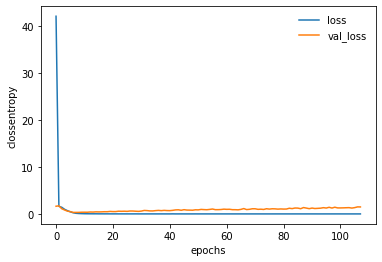

In [ ]:
#グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) #凡例フレームを表示しない
plt.xlabel('epochs')
plt.ylabel('clossentropy')
plt.show()

In [ ]:
#モデルの評価(テストデータによる評価)
y_pred = model.predict_classes(x_test_g)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1000
           1       0.84      0.86      0.85      1000
           2       0.83      0.85      0.84      1000
           3       0.91      0.93      0.92      1000
           4       0.84      0.84      0.84      1000
           5       0.91      0.85      0.88      1000
           6       0.84      0.88      0.86      1000
           7       0.88      0.81      0.85      1000
           8       0.87      0.90      0.89      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#5補足:CNNモデルの考察

In [ ]:
#フィルタの確認

#(1)フィルタの取得

#全パラメータの取得
w = model.get_weights()

#0層目(Conv2D)の全パラメータ(フィルタ)の形状確認
w[0].shape

(3, 3, 1, 392)

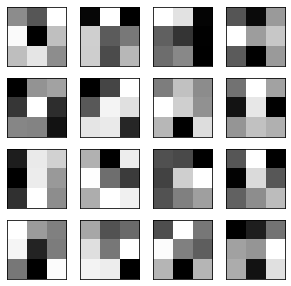

ax形状: (4, 4)


In [ ]:
#(2)フィルタの可視化

#4行4列にグラフを分割(上から16個のフィルタを抜粋)
#subplot()はAxesオブジェクト(グラフ描画等)、subplots()はFigure(領域確保)とAxesオブジェクトを返す。
fig, ax = plt.subplots(4, 4, figsize=(5, 5))

for i in range(4):
  for j in range(4):
    z = i*4+j
    #グレースケールの場合、形状は(M,N)でcmap='Grey'で描画する
    ax[i, j].imshow(w[0][:,:,:,z].reshape(3, 3),cmap='Greys')
    #tick_paramsは目盛りの設定を行う
    ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()
print('ax形状:', ax.shape)

In [ ]:
#テストデータの出力値の確認

#各層の(学習データの）出力値を取得
#ライブラリの読込み
from tensorflow.keras import models

#CNNモデルの各層出力を取得(リスト内包表式)*modelは上のライブラリのmodelsでは無く先ほどのモデル
layer_outputs = [layer.output for layer in model.layers[:5]]

#function API記法（モデルの一部の入出力を取り出す等複雑なモデルを作成出来る）により先ほどの入出力となるモデルを作成
activation_model = models.Model(inputs=model.input, outputs=layer_outputs[0])
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 392)       3920      
Total params: 3,920
Trainable params: 3,920
Non-trainable params: 0
_________________________________________________________________


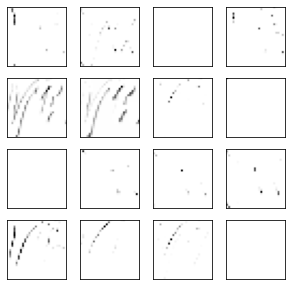

In [ ]:
#出力値の可視化

#API作成モデルにpredictを施すと出力値が得られる(predictの引数は学習データと同じ4次元に揃えている)
activations = activation_model.predict(x_test_g[0:1])

#4行4列にグラフを分割(上から16個のフィルタを通した出力値を抜粋)
fig, ax = plt.subplots(4, 4, figsize=(5, 5))

for i in range(4):
  for j in range(4):
    z = i*4+j
    #テストデータの0番目(:にすると次元オーバでエラーとなるので0で次元削減している)
    ax[i, j].imshow(activations[0,:,:,z], cmap='Greys')
    ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
  
plt.show()

2


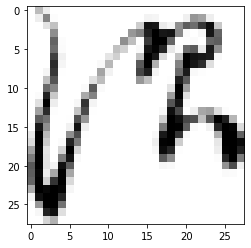

In [ ]:
#入力したテストデータの確認
plt.imshow(x_test[0], cmap='Greys')
print(y_test[0])

#考察：入力画像の線の向きは縦方向が多い為、縦型(左右のどちらが黒でどちらかが白）のフィルタを
#通過した出力が入力画像の特徴をよく捉えている事が分かる

#6.モデル性能の改善

In [ ]:
#必要なライブラリのインポート
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
#ニューラルネットワークモデルの構築

#モデルの初期化
model = keras.Sequential()

#CNN層(入力層)　(パディングによって出力形状が入力形状と同じ28×28になるよう可能)
model.add(Conv2D(32, kernel_size=3, padding='same', strides=1,
                 input_shape=(28, 28, 1), activation='relu'))


#プーリング層(不変性を実現する為、集約演算を行う)
model.add(MaxPooling2D(pool_size=(2, 2)))


#ドロップアウト層(特定ユニットの過大or過小学習を防ぐ為、ランダムにユニットを休ませる)
model.add(Dropout(0.25))


#繰り返し層
#プーリング層で画像サイズが1/2になったのでパラメータ数を2倍にして情報量を維持している
model.add(Conv2D(64, kernel_size=3, padding='same', strides=1,
                 input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))


#繰り返し層(2)
#プーリング層で画像サイズが1/2になったのでパラメータ数を2倍にして情報量を維持している
model.add(Conv2D(128, kernel_size=3, padding='same', strides=1,
                 input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

#繰り返し層(3)
#プーリング層で画像サイズが1/2になったのでパラメータ数を2倍にして情報量を維持している
model.add(Conv2D(256, kernel_size=3, padding='same', strides=1,
                 input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))


#平滑化層
model.add(Flatten())#最終的な出力層の形状と同じ1次元に変換

#全結合層
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

#ドロップアウト層
model.add(Dropout(0.5))

#全結合層(出力層)
model.add(Dense(10, activation='softmax'))

#モデルの構築
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#モデルの構造を表示
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [ ]:
#ニューラルネットワークの学習
%%time

log = model.fit(x_train_g, y_train_c, epochs=3000,batch_size=2000, verbose=True,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(x_valid_g, y_valid_c))

Epoch 1/3000
21/21 [==============================] - 7s 174ms/step - loss: 19.9405 - accuracy: 0.1008 - val_loss: 2.3598 - val_accuracy: 0.0984
Epoch 2/3000
21/21 [==============================] - 3s 161ms/step - loss: 2.3733 - accuracy: 0.0991 - val_loss: 2.3593 - val_accuracy: 0.0975
Epoch 3/3000
21/21 [==============================] - 3s 162ms/step - loss: 2.3620 - accuracy: 0.1029 - val_loss: 2.3581 - val_accuracy: 0.0975
Epoch 4/3000
21/21 [==============================] - 3s 163ms/step - loss: 2.3596 - accuracy: 0.1005 - val_loss: 2.3557 - val_accuracy: 0.0975
Epoch 5/3000
21/21 [==============================] - 3s 161ms/step - loss: 2.3550 - accuracy: 0.1006 - val_loss: 2.3517 - val_accuracy: 0.0975
Epoch 6/3000
21/21 [==============================] - 3s 161ms/step - loss: 2.3526 - accuracy: 0.1021 - val_loss: 2.3458 - val_accuracy: 0.0975
Epoch 7/3000
21/21 [==============================] - 3s 162ms/step - loss: 2.3472 - accuracy: 0.1024 - val_loss: 2.3387 - val_accuracy

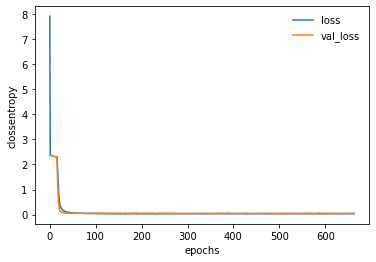

In [ ]:
#グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) #凡例フレームを表示しない
plt.xlabel('epochs')
plt.ylabel('clossentropy')
plt.show()

In [ ]:
#モデルの評価(テストデータによる評価)
y_pred = model.predict_classes(x_test_g)

print(classification_report(y_pred, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1002
           1       0.96      0.99      0.97       967
           2       0.94      0.96      0.95       985
           3       0.99      0.97      0.98      1022
           4       0.95      0.96      0.96       992
           5       0.96      0.99      0.97       977
           6       0.98      0.97      0.98      1014
           7       0.99      0.99      0.99      1004
           8       0.99      0.96      0.98      1031
           9       0.99      0.98      0.98      1006

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

